In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
1,2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2,2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
3,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100
4,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600


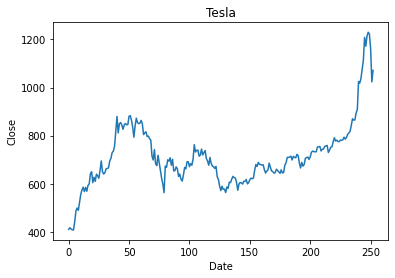

In [ ]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [ ]:

data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [ ]:
data = data.rename(columns={"Date" : "ds", "Close" : "y"})

In [ ]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
613,2022-11-06,2711.281201,1801.383828,3704.811664
614,2022-11-07,2752.083204,1835.196708,3722.203697
615,2022-11-08,2755.618471,1832.447369,3753.620261
616,2022-11-09,2760.583587,1832.141684,3768.307420
617,2022-11-10,2765.255747,1848.144065,3763.996480


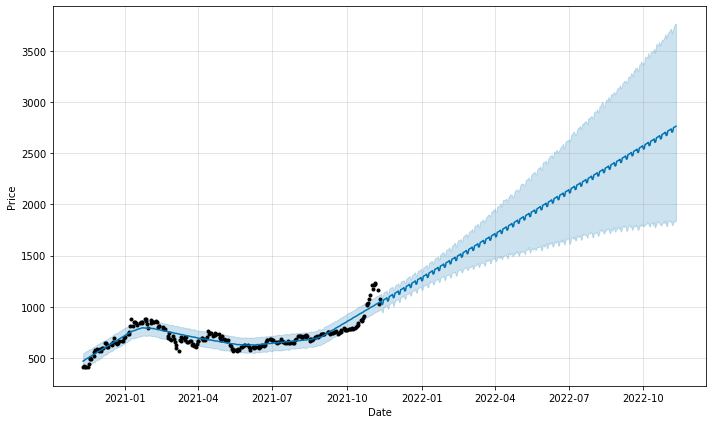

In [ ]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")